In [6]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## OVERVIEW OF THE DATASET

#### How many rows and columns does the dataset contain?

In [36]:
#load csv file

spotifydf = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')

#use shape function to get number of rows and columns of dataset

row_count, column_count = spotifydf.shape
print("The dataset contains " + str(row_count) + " rows and " + str(column_count) + " columns." )
df

The dataset contains 953 rows and 24 columns.


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#### What are the data types of each column?

In [38]:
#use dtype function to print the data type of each column

print(spotifydf.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


#### Are there any missing values? 

In [40]:
print(spotifydf.isnull().values.any())

True


In [44]:
#check for missing values

print("Columns with the missing values:")
print(spotifydf.isnull().sum())

Columns with the missing values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


## BASIC DESCRIPTIVE STATISTICS

#### What are the mean, median, and standard deviation of the streams column?

In [86]:
#declare stream column as s 
s = 'streams'

#get statistical data (mean, median, and standard deviation)
mean_streams = spotifydf[s].mean()
median_streams = spotifydf[s].median()
stdev_streams = spotifydf[s].std()

In [96]:
#print mean, median, and standard deviation of stream column

print("Summary of Streams Data")
print("Mean of " + x + " : " + str(mean_streams))
print("Median of " + x + " : " + str(median_streams))
print("Standard Deviation of " + x + " : " + str(stdev_streams))

Summary of Streams Data
Mean of streams : 514137424.93907565
Median of streams : 290530915.0
Standard Deviation of streams : 566856949.0388832


#### What is the distribution of released_year?

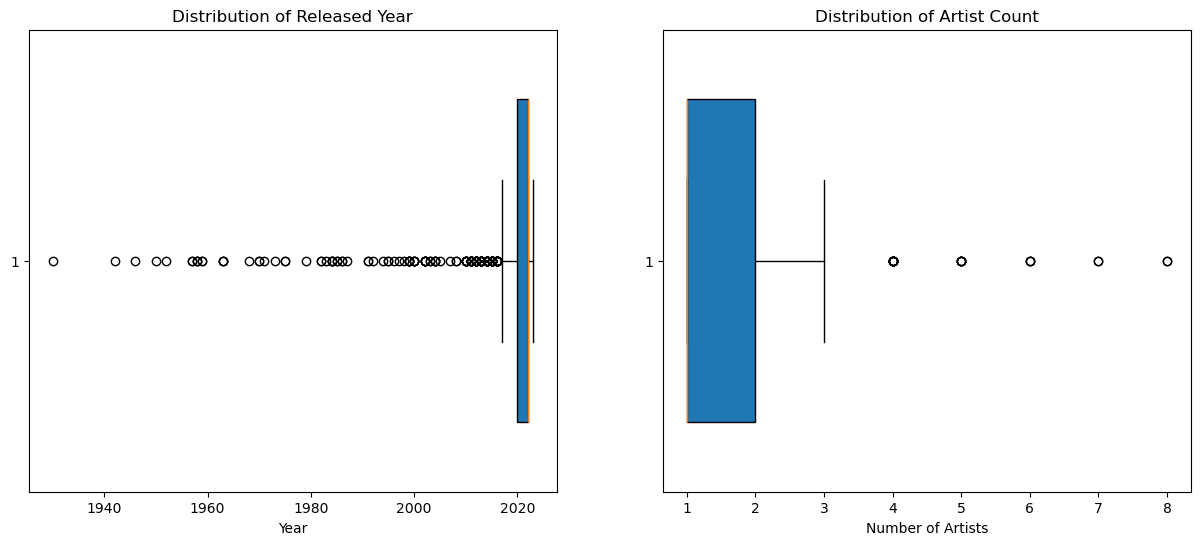

In [151]:
# Create the box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for released_year
axes[0].boxplot(spotifydf['released_year'], vert=False, widths=0.7, patch_artist=True)
axes[0].set_title('Distribution of Released Year')
axes[0].set_xlabel('Year')

# Boxplot for artist_count
axes[1].boxplot(spotifydf['artist_count'], vert=False, widths=0.7, patch_artist=True)
axes[1].set_title('Distribution of Artist Count')
axes[1].set_xlabel('Number of Artists')

# Display the plots
plt.show()

#### OUTLIERS (WHISKERS OF THE BOX PLOT)

In [153]:
#create a function calculates and displays outliers

def count_outliers(s):
    #calculating Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = spotifydf[s].quantile(0.25)
    Q3 = spotifydf[s].quantile(0.75)
    
    #calculating interquartile range (IQR)
    IQR = Q3 - Q1
    
    #define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #identifying outliers
    outliers = spotifydf[(spotifydf[s] < lower_bound) | (spotifydf[s] > upper_bound)]
    print("Number of outliers in '{}': {}".format(s, len(outliers)))
    
#Print
count_outliers('released_year')
count_outliers('artist_count')    

Number of outliers in 'released_year': 151
Number of outliers in 'artist_count': 27


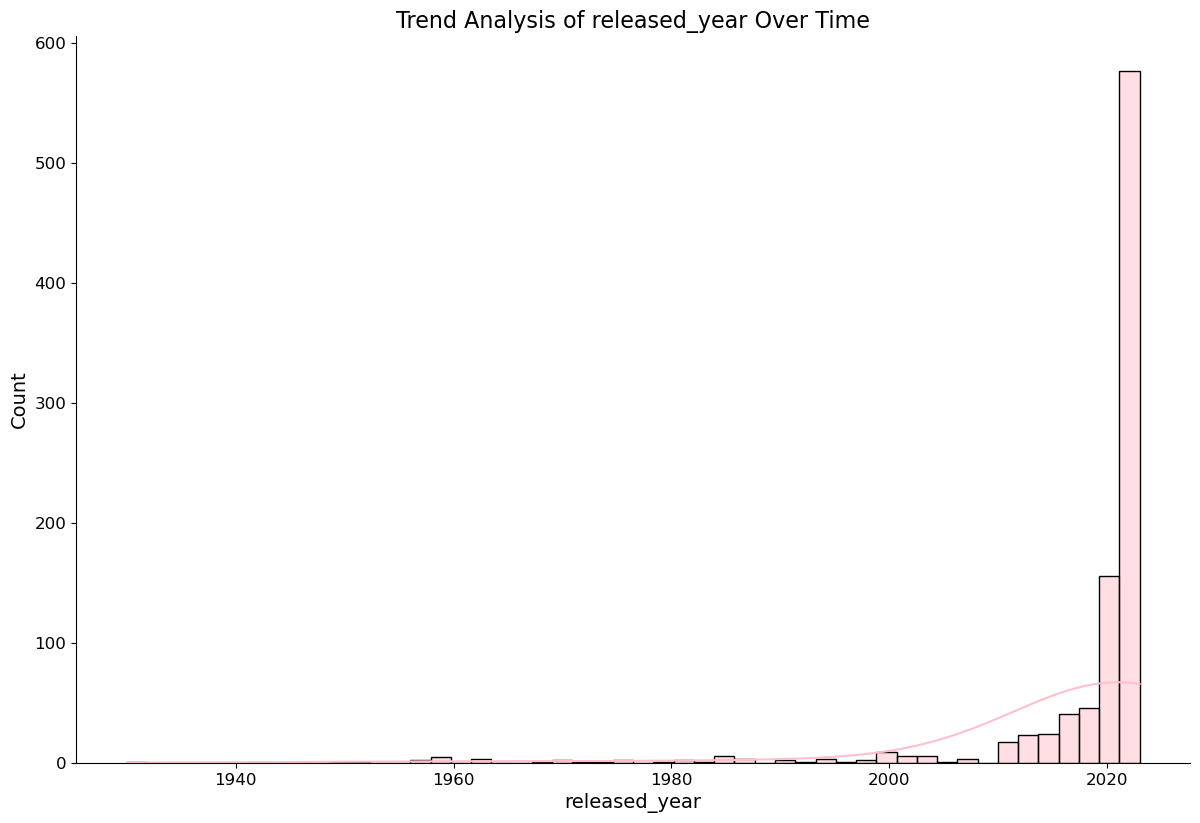

Most common released_year: 2022 with 402 occurrences
Least common released_year: 1930 with 1 occurrences


In [167]:
#create a function that displays the least and most common released year of songs

def analyze_trends(column):
    trend_data = spotifydf[column].value_counts().sort_index() # Calculate value counts for each year
    
    #convert the index and values to a data for easy plotting
    trend_df = trend_data.reset_index()
    trend_df.columns = [column, 'Count']

    # Use seaborn displot function
    sns.displot(
        trend_df, x=column, weights='Count', kde=True, bins=len(trend_df), color='pink',
        height=8, aspect=1.5)  #adjust its size 

    #title and labels
    plt.title('Trend Analysis of {} Over Time'.format(column), fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    #print the numbers of most and least common years
    most_common_year = trend_data.idxmax()
    least_common_year = trend_data.idxmin()
    print("Most common {}: {} with {} occurrences".format(column, most_common_year, trend_data.max()))
    print("Least common {}: {} with {} occurrences".format(column, least_common_year, trend_data.min()))

analyze_trends('released_year')

## TOP PERFORMERS

#### Display 5 of the most streamed tracks

In [173]:
#sort by streams to get the top 5 tracks
top_streamed_tracks = spotifydf[['track_name', 'artist(s)_name', 'streams']].sort_values( by = 'streams', ascending = False).head(5)

#use for loop to print each trakc
print("Top 5 Most Streamed Tracks: ")

for i, row in top_streamed_tracks.iterrows():
    print(row['track_name'], "by", row['artist(s)_name'], "with a stream count of: ", row['streams'])

Top 5 Most Streamed Tracks: 
Blinding Lights by The Weeknd with a stream count of:  3703895074.0
Shape of You by Ed Sheeran with a stream count of:  3562543890.0
Someone You Loved by Lewis Capaldi with a stream count of:  2887241814.0
Dance Monkey by Tones and I with a stream count of:  2864791672.0
Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee with a stream count of:  2808096550.0


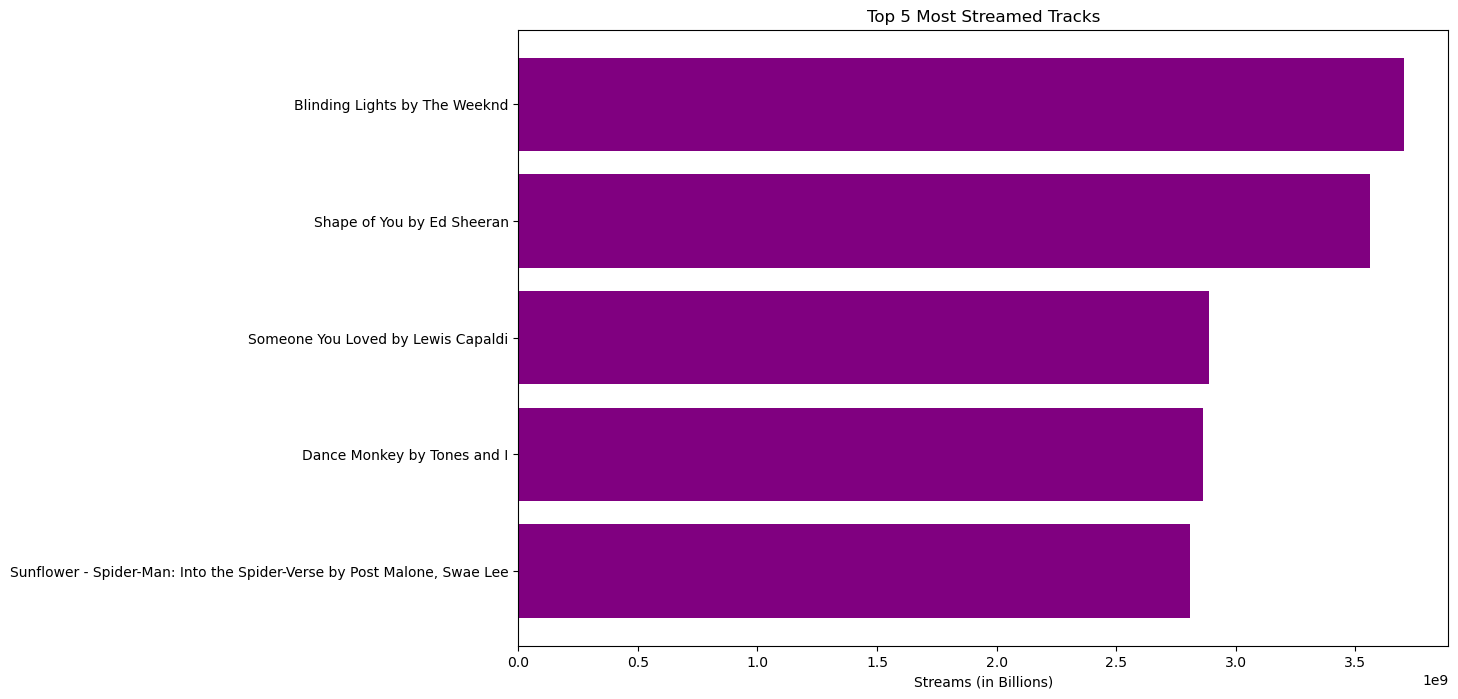

In [176]:
#create a bar graph for visual representation

plt.figure(figsize=(12, 8))
plt.barh(top_streamed_tracks['track_name'] + " by " + top_streamed_tracks['artist(s)_name'], top_streamed_tracks['streams'], color='purple')
plt.xlabel('Streams (in Billions)')
plt.title('Top 5 Most Streamed Tracks')
plt.gca().invert_yaxis()  #display highest at the top
plt.show()

#### Identify the top 5 most frequent artist based on number of tracks

In [185]:
#count each appearance of each artist and then get the top 5 

top_artists = spotifydf['artist(s)_name'].value_counts().head(5)

#print top 5
print("The Top 5 Most Frequent Artists: ")

for artist, count in top_artists.items():
    print(artist + "with a number of tracks of: " + str(count))

The Top 5 Most Frequent Artists: 
Taylor Swiftwith a number of tracks of: 34
The Weekndwith a number of tracks of: 22
Bad Bunnywith a number of tracks of: 19
SZAwith a number of tracks of: 19
Harry Styleswith a number of tracks of: 17


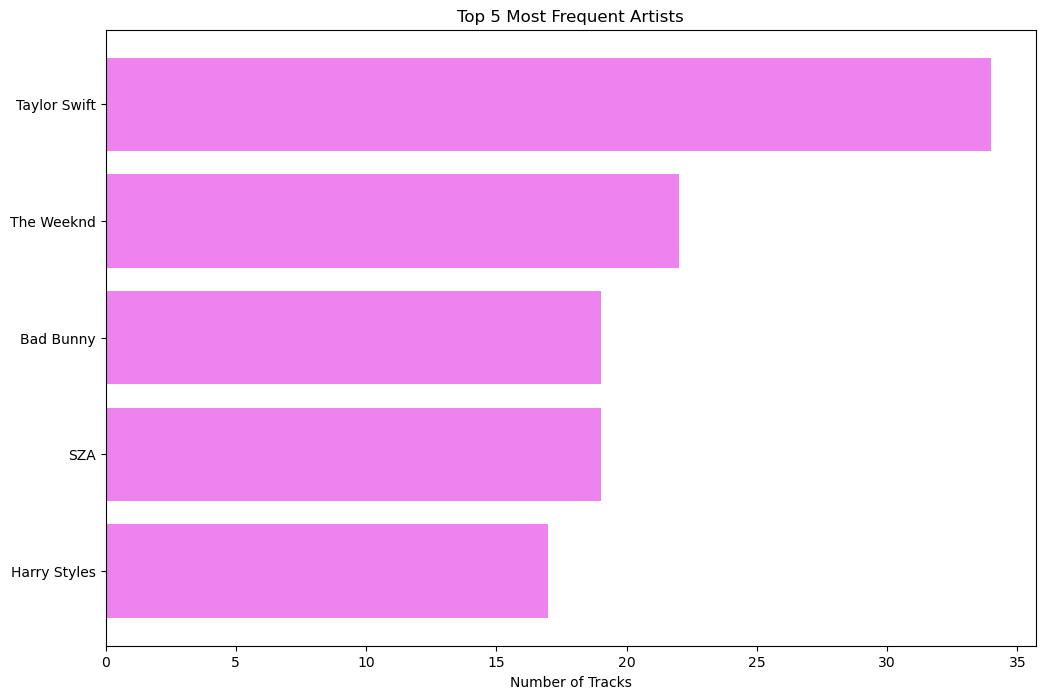

In [207]:
#create bar graph for visual representation

plt.figure(figsize=(12, 8))
plt.barh(top_artists.index, top_artists.values, color = 'violet')
plt.xlabel('Number of Tracks')
plt.title('Top 5 Most Frequent Artists')
plt.gca().invert_yaxis()  
plt.show()

## TEMPORAL TRENDS

#### Get number of tracks released over time and plot number of tracks released per year

In [211]:
#count the number of tracks released per year and per month
yearly_release = spotifydf['released_year'].value_counts().sort_index()
monthly_release = spotifydf['released_month'].value_counts().sort_index()

#print the trend analysis
print("Trend Analysis of Track Releases Over Time:")
for year, count in yearly_release.items():
    print("Year:", year, "|| Number of Tracks Released:", count)

#determine the month with the highest releases
most_common_month = monthly_release.idxmax()
most_common_month_count = monthly_release.max()

# Display the monthly release pattern
print("\nTrack Releases Per Month:")
for month, count in monthly_release.items():
    print("Month:", month, "|| Number of Tracks Released:", count)

# Print the month with the most releases
print("\nMonth with the most releases:", most_common_month, "with", most_common_month_count, "releases.")

Trend Analysis of Track Releases Over Time:
Year: 1930 || Number of Tracks Released: 1
Year: 1942 || Number of Tracks Released: 1
Year: 1946 || Number of Tracks Released: 1
Year: 1950 || Number of Tracks Released: 1
Year: 1952 || Number of Tracks Released: 1
Year: 1957 || Number of Tracks Released: 2
Year: 1958 || Number of Tracks Released: 3
Year: 1959 || Number of Tracks Released: 2
Year: 1963 || Number of Tracks Released: 3
Year: 1968 || Number of Tracks Released: 1
Year: 1970 || Number of Tracks Released: 2
Year: 1971 || Number of Tracks Released: 1
Year: 1973 || Number of Tracks Released: 1
Year: 1975 || Number of Tracks Released: 2
Year: 1979 || Number of Tracks Released: 1
Year: 1982 || Number of Tracks Released: 2
Year: 1983 || Number of Tracks Released: 1
Year: 1984 || Number of Tracks Released: 4
Year: 1985 || Number of Tracks Released: 2
Year: 1986 || Number of Tracks Released: 2
Year: 1987 || Number of Tracks Released: 1
Year: 1991 || Number of Tracks Released: 2
Year: 1992

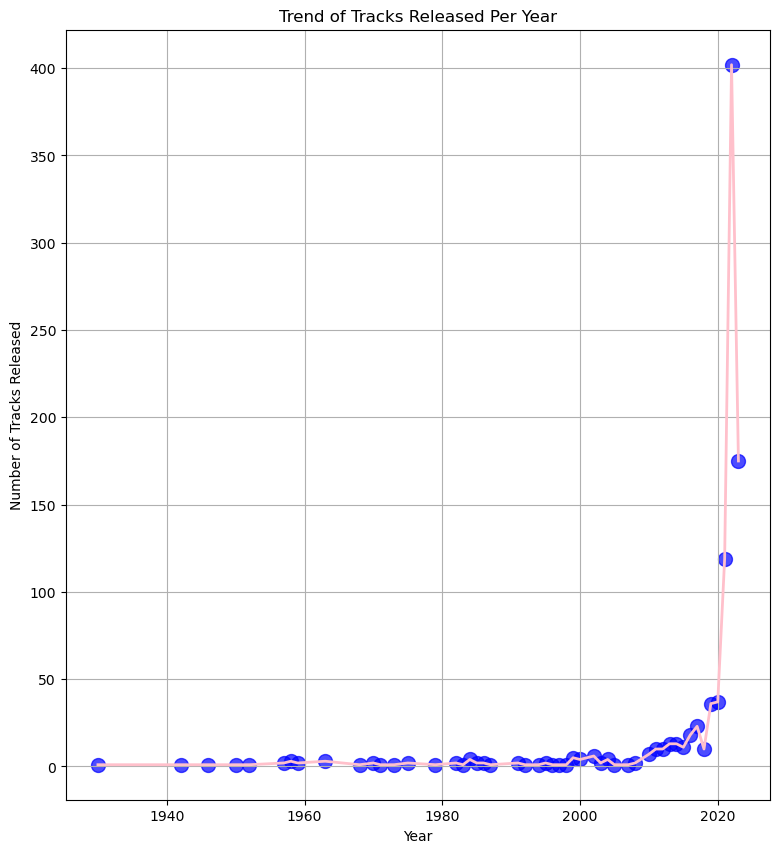

In [217]:
#adjust for better representation
plt.figure(figsize=(20, 10))

#visualization of the yearly trend using a scatter plot

plt.subplot(1, 2, 1)
plt.scatter(yearly_release.index, yearly_release.values, color='b', alpha=0.7, s=100)
plt.plot(yearly_release.index, yearly_release, color='pink', linewidth=2)
plt.title('Trend of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.grid(True)

#### Check for patterns in monthly released tracks and see which has the most releases

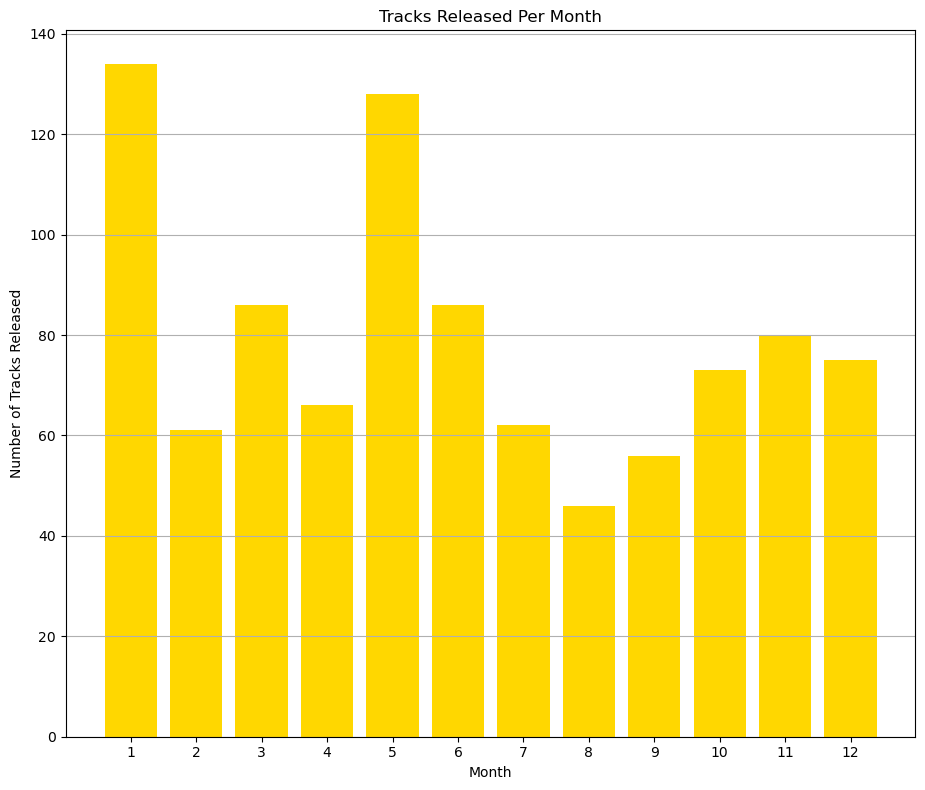

In [225]:
plt.figure(figsize=(18, 8))

#create a bar graph for the monthly trend
plt.subplot(1, 2, 2)
plt.bar(monthly_release.index, monthly_release.values, color='gold')
plt.title('Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(range(1, 13))  #months
plt.grid(axis='y')

#prevent overlap
plt.tight_layout()

#display
plt.show()

##### Base on this, after "Ber" months, songs released over these months gradually increase then spikes during New Year

## GENRE AND MUSIC CHARACTERISTICS

### The correlation between streams and musical attributes such as bpm, danceability, and energy. Display which attribute seems to be influencing the streams the most.

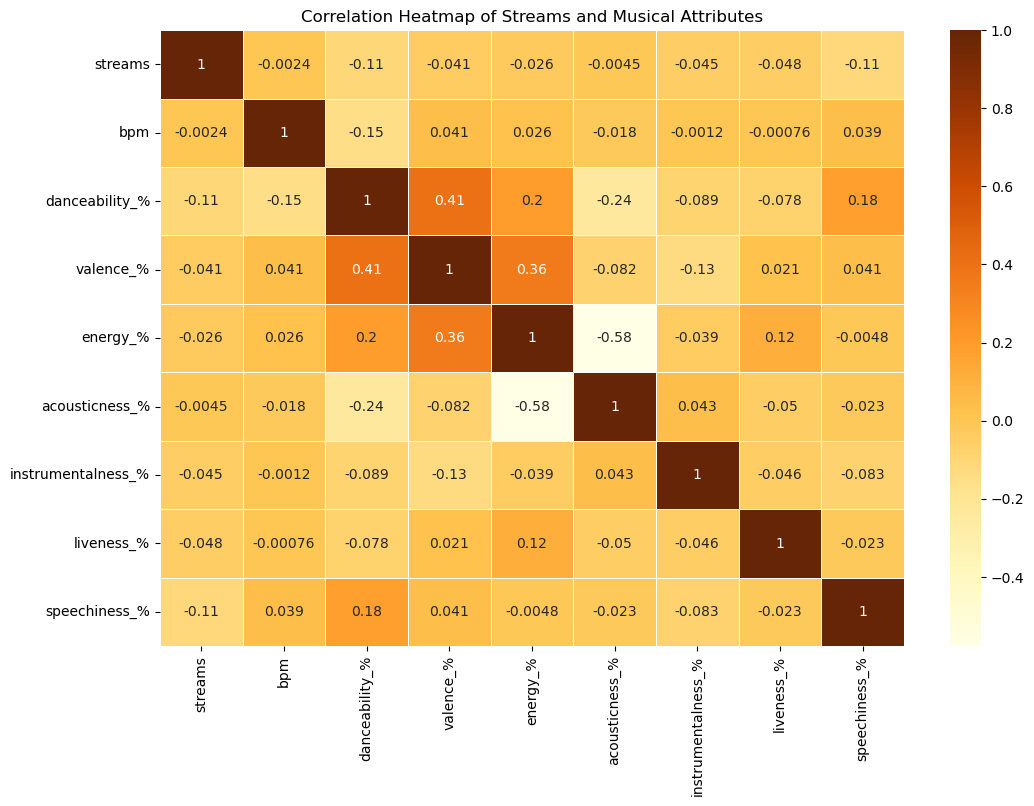

In [233]:
#pick out the columns of attribute
attributes = ['streams', 'bpm', 'danceability_%', 'valence_%', 
              'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

#compute for the correlation
correlation_matrix = spotifydf[attributes].corr()

# Use and create heatmap for correlation display and print
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Heatmap of Streams and Musical Attributes')
plt.show()

#### As we can observe from the results, despite having weak correlation due to low value output the attribute which seems to be influencing the streams the most is speechiness

### Get correlation of danceability and energy, as well as, correlation of valence and acousticness

In [242]:
#compute the correlation matrix
correlation_matrix = spotifydf[attributes].corr()

danceability_energy_corr = correlation_matrix.loc['danceability_%', 'energy_%']

#Print correlation of danceability and energy
print("Correlation between Danceability and Energy: {:.2f}".format(danceability_energy_corr))

valence_acousticness_corr = correlation_matrix.loc['valence_%', 'acousticness_%']

#Print correlation of valence and acousticness
print("Correlation between Valence and Acousticness: {:.2f}".format(valence_acousticness_corr))

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


## PLATFORM POPULARITY

#### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? 

In [255]:
total_sp_playlists = spotifydf['in_spotify_playlists'].sum()
total_sp_charts = spotifydf['in_spotify_charts'].sum()
total_ap_playlists = spotifydf['in_apple_playlists'].sum()

# Print results
print("Platform Popularity Comparison:")
print("Total Tracks in Spotify Playlists: " + str(total_sp_playlists))
print("Total Tracks in Spotify Charts: " + str(total_sp_charts))
print("Total Tracks in Apple Playlists: " + str(total_ap_playlists))

Platform Popularity Comparison:
Total Tracks in Spotify Playlists: 4955719
Total Tracks in Spotify Charts: 11445
Total Tracks in Apple Playlists: 64625


#### Which platform seems to favor the most popular tracks?

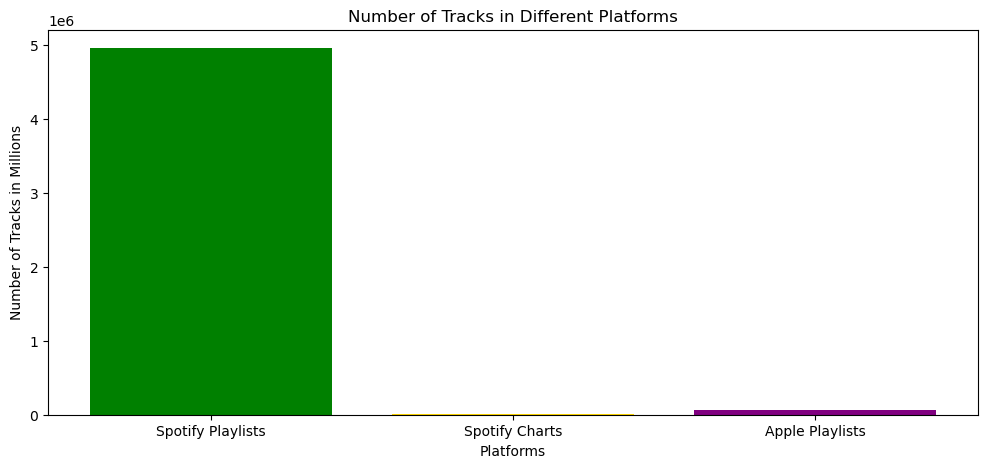

In [261]:
#initialize variable and put data
platform = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
total = [total_sp_playlists, total_sp_charts, total_ap_playlists]

#plot bar graph
plt.figure(figsize=(12, 5))
plt.bar(platform, total, color=['green', 'gold', 'purple'])
plt.title('Number of Tracks in Different Platforms')
plt.ylabel('Number of Tracks in Millions')
plt.xlabel('Platforms')
plt.show()

##### This graph show that the number of tracks in Spotify Playlists dominates compared to other platforms

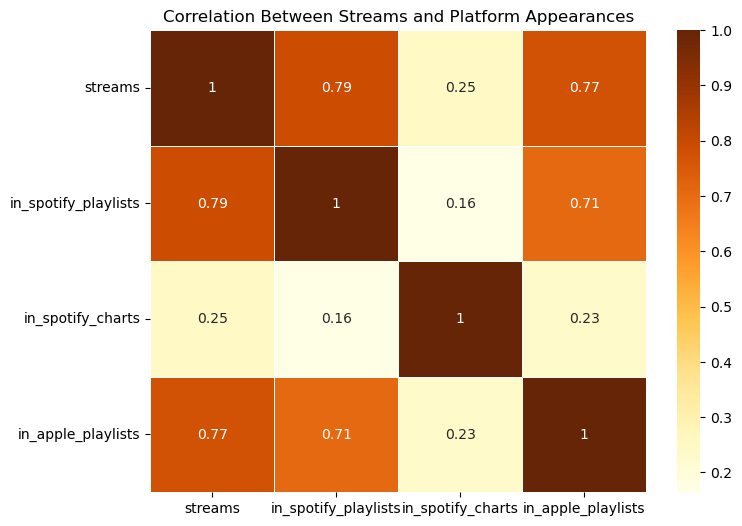

In [272]:
#create correlation heatmap to show the relationship of streams and occurences
platform_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']
correlation_matrix = spotifydf[platform_columns].corr()

#plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Correlation Between Streams and Platform Appearances")
plt.show()

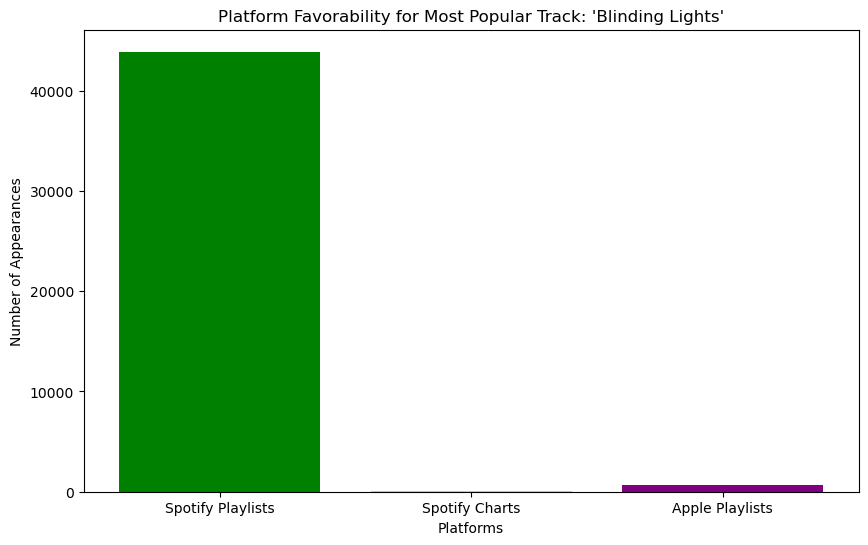

In [276]:
# Identify the track with the highest stream count
most_pop_track = spotifydf.loc[spotifydf['streams'].idxmax()]

# Extract the values of the most popular track on each of the platform
platform_favor_counts = [
    most_pop_track['in_spotify_playlists'],
    most_pop_track['in_spotify_charts'],
    most_pop_track['in_apple_playlists']
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(platform, platform_favor_counts, color=['green', 'gold', 'purple'])
plt.title(f"Platform Favorability for Most Popular Track: '{most_pop_track['track_name']}'")
plt.ylabel('Number of Appearances')
plt.xlabel('Platforms')
plt.show()

##### The heatmap reveals a strong positive correlation between 'Spotify Playlists' and stream counts. This suggests that tracks with higher streaming numbers are more likely to appear on this platform. Additionally, "Blinding Lights," the most popular track, appears frequently on 'Spotify Playlists,' further indicating the platform's preference for the most prominent tracks.

## ADVANCED ANALYSIS

#### Determine a pattern or trend among tracks with the samek key and with respect to their streams

In [283]:
# Exclude tracks with empty keys
filter_data = spotifydf[spotifydf['key'] != '"N/A"']

# Get the total count, streams, and mean of each key and store in a variable
key_counts = filter_data['key'].value_counts().sort_index()
key_total_streams = filter_data.groupby('key')['streams'].sum()
key_mean_streams = filter_data.groupby('key')['streams'].mean()

# Print results
print("Key Counts:\n", key_counts)
print("\nKey Total Streams:\n", key_total_streams)
print("\nKey Mean Streams:\n", key_mean_streams)

Key Counts:
 key
A      75
A#     57
B      81
C#    120
D      81
D#     33
E      62
F      89
F#     73
G      96
G#     91
Name: count, dtype: int64

Key Total Streams:
 key
A     3.025426e+10
A#    3.149110e+10
B     4.206718e+10
C#    7.251363e+10
D     4.289157e+10
D#    1.825021e+10
E     3.580483e+10
F     4.169173e+10
F#    3.813251e+10
G     4.344954e+10
G#    4.339898e+10
Name: streams, dtype: float64

Key Mean Streams:
 key
A     4.088414e+08
A#    5.524754e+08
B     5.193480e+08
C#    6.042802e+08
D     5.295256e+08
D#    5.530365e+08
E     5.774972e+08
F     4.684464e+08
F#    5.223632e+08
G     4.525994e+08
G#    4.769119e+08
Name: streams, dtype: float64


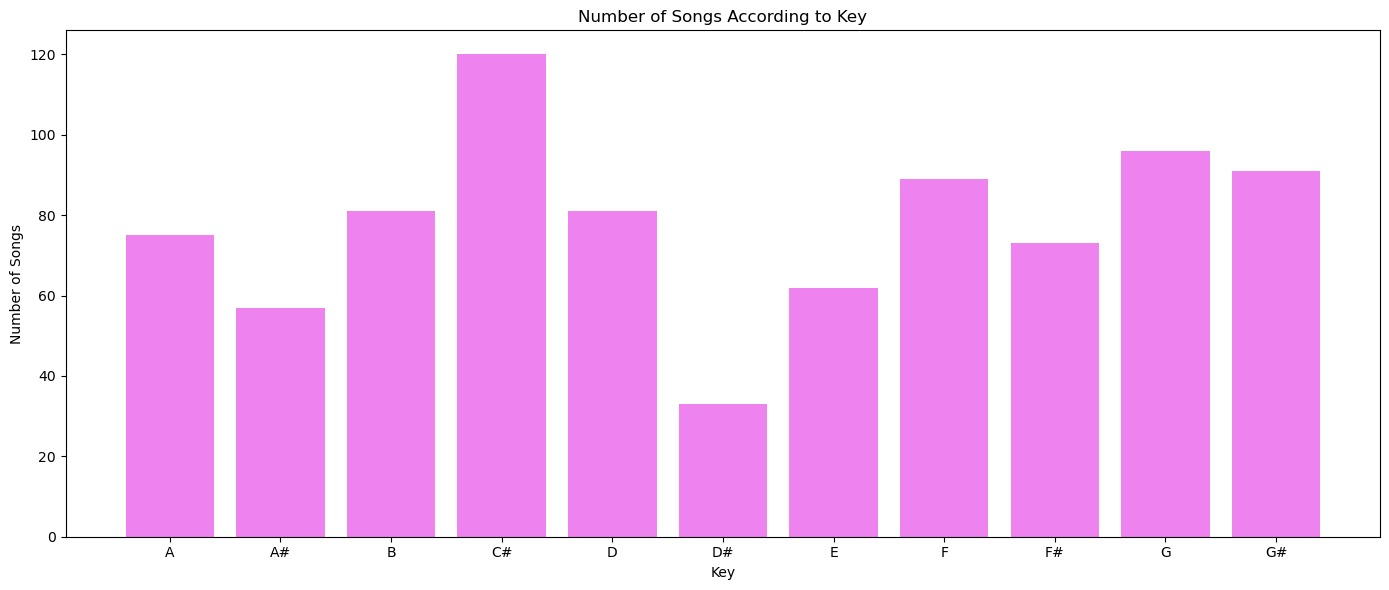

In [294]:
#plotting count of songs for each key

plt.figure(figsize=(14, 6))
plt.bar(key_counts.index, key_counts.values, color='violet')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.title('Number of Songs According to Key')
plt.tight_layout()  
plt.show()


##### According to this graph, the tracks which are typically produced are in the keys C#, G, and F.

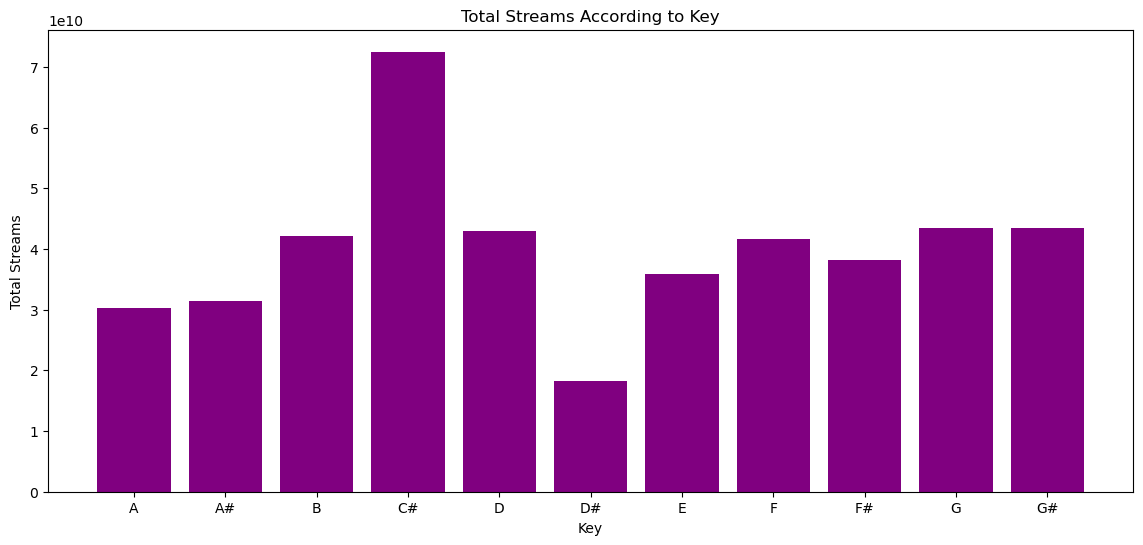

In [298]:
# Plot total streams for each key
plt.figure(figsize=(14, 6))
plt.bar(key_total_streams.index, key_total_streams.values, color='purple')
plt.xlabel('Key')
plt.ylabel('Total Streams')
plt.title('Total Streams According to Key')
plt.show()

##### C# leads the graph with the highest total number of streams, followed by G, and last is G#.

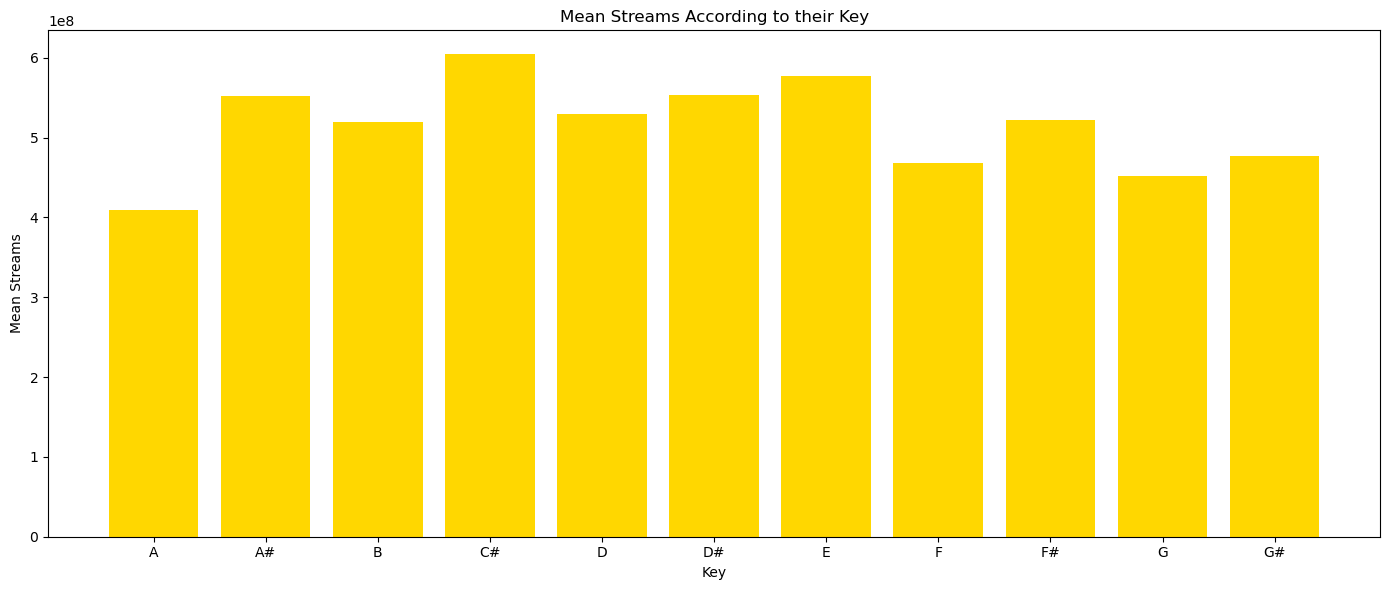

In [307]:
#plot mean streams for each key

plt.figure(figsize = (14,6))
plt.bar(key_mean_streams.index, key_mean_streams.values, color='gold')
plt.xlabel('Key')
plt.ylabel('Mean Streams')
plt.title('Mean Streams According to their Key')
plt.tight_layout()
plt.show()

#### Determine pattern or trend among tracks with same mode and with respect to their streams.

In [313]:
#calculate for the count, stream, and mean of each mode
mode_counts = spotifydf['mode'].value_counts()
mode_total_streams = spotifydf.groupby('mode')['streams'].sum()
mode_mean_streams = spotifydf.groupby('mode')['streams'].mean()

#call function and print 
mode_counts, mode_total_streams, mode_mean_streams

(mode
 Major    550
 Minor    403
 Name: count, dtype: int64,
 mode
 Major    2.936232e+11
 Minor    1.958356e+11
 Name: streams, dtype: float64,
 mode
 Major    5.348328e+08
 Minor    4.859445e+08
 Name: streams, dtype: float64)

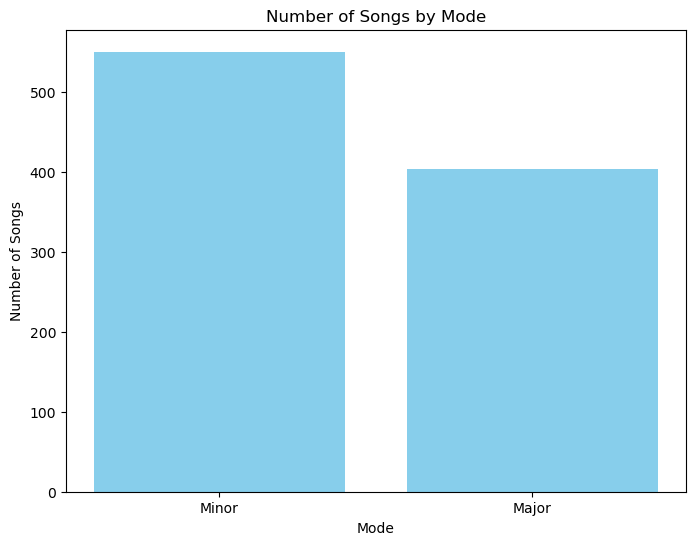

In [319]:
#plot the count for mode
plt.figure(figsize=(8, 6))
plt.bar(mode_counts.index, mode_counts.values, color = 'skyblue')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Mode')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()

##### More tracks are made in Minor in contrast to Major

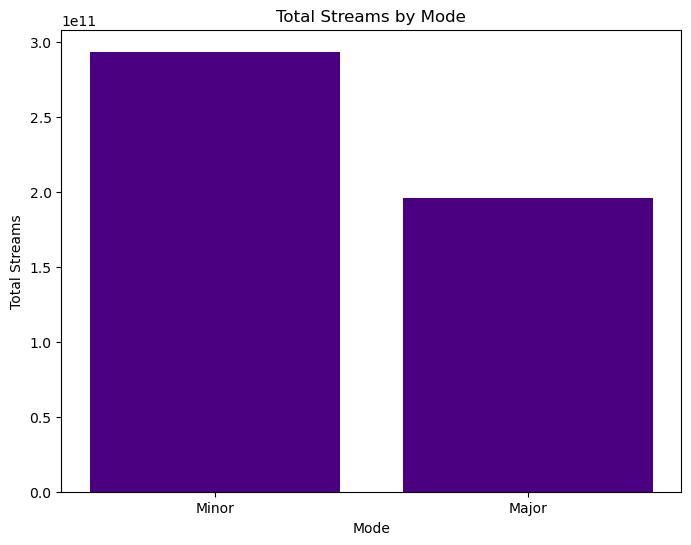

In [371]:
#plot total streams by mode

plt.figure(figsize=(8, 6))
plt.bar(mode_total_streams.index, mode_total_streams.values, color='indigo')
plt.xlabel('Mode')
plt.ylabel('Total Streams')
plt.title('Total Streams by Mode')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()

#### ANALYZE IF CERTAIN ARTISTS APPEAR MORE ON PLAYLISTS OR CHARTS

In [374]:
#analyze most frequent artists in all playlists and charts in all different platforms

playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']

In [376]:
#group by artist and get sum 

artist_playlist_counts = spotifydf.groupby('artist(s)_name')['total_playlist_occurrences'].sum().sort_values(ascending=False).head(10)
artist_chart_counts = spotifydf.groupby('artist(s)_name')['total_chart_occurrences'].sum().sort_values(ascending=False).head(10)

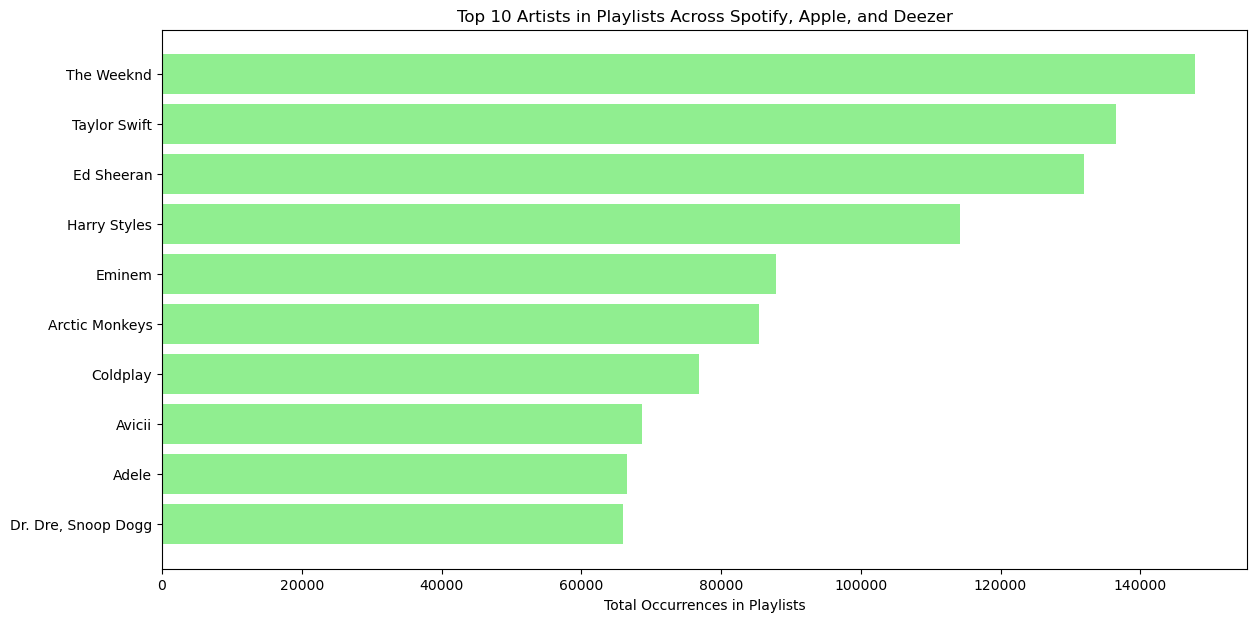

In [378]:
#plot for the most occuring artists in playlist across different platforms

plt.figure(figsize=(14, 7))
plt.barh(artist_playlist_counts.index, artist_playlist_counts.values, color='lightgreen')
plt.xlabel('Total Occurrences in Playlists')
plt.title('Top 10 Artists in Playlists Across Spotify, Apple, and Deezer')
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()

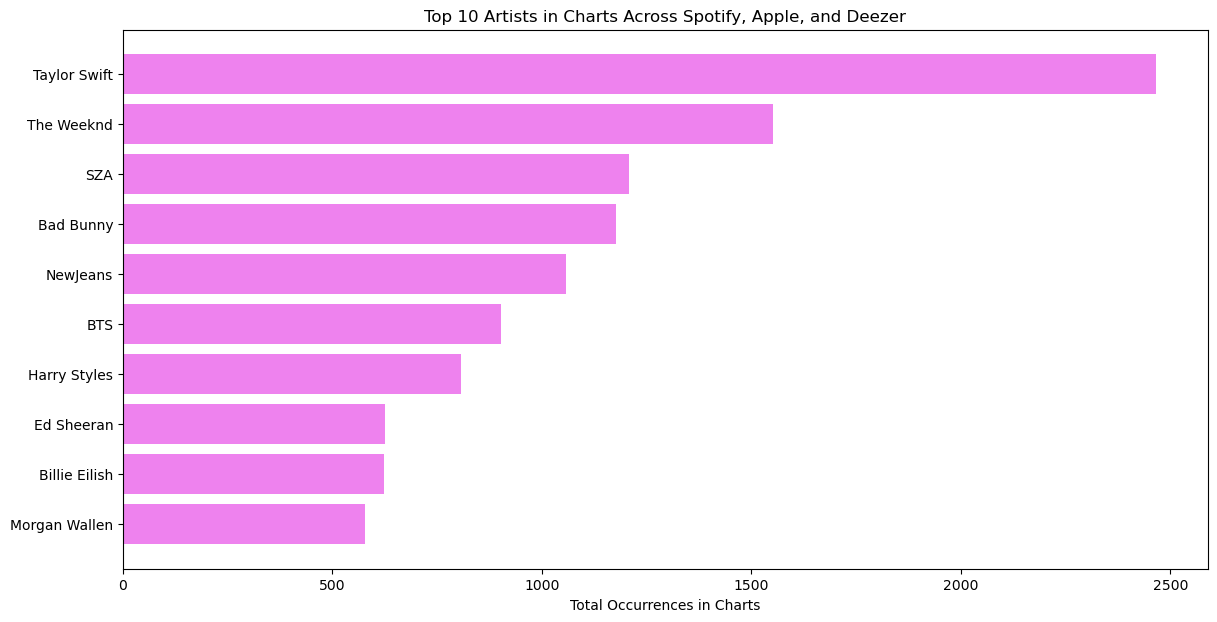

In [380]:
# Plot for most occuring characters in charts
plt.figure(figsize=(14, 7))
plt.barh(artist_chart_counts.index, artist_chart_counts.values, color='violet')
plt.xlabel('Total Occurrences in Charts')
plt.title('Top 10 Artists in Charts Across Spotify, Apple, and Deezer')
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()

##### The graph shows that several artists, including Ed Sheeran and Harry Styles, frequently appear in both playlists and charts. However, Taylor Swift and The Weeknd stand out as the top artists, practically alternating positions across playlists and charts. 